In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1

## i

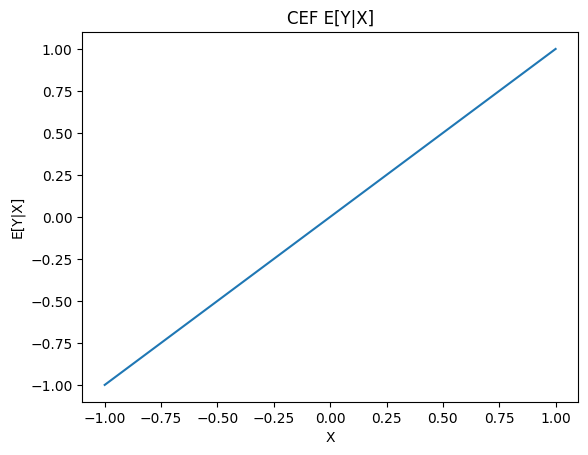

In [ ]:
plt.plot(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
plt.title("CEF E[Y|X]")
plt.xlabel("X")
plt.ylabel("E[Y|X]")
plt.show()

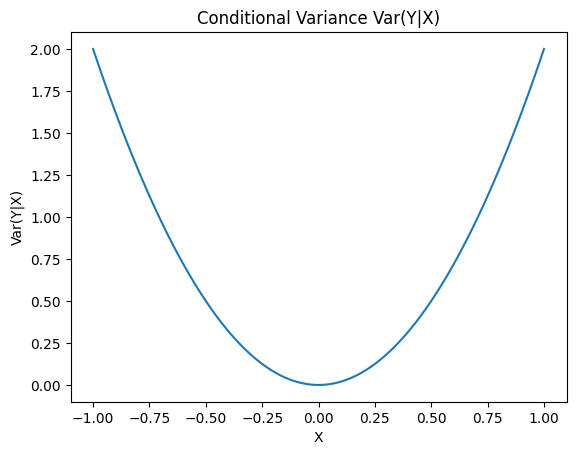

In [4]:
plt.plot(np.linspace(-1, 1, 100), 2 * np.linspace(-1, 1, 100)**2)
plt.title("Conditional Variance Var(Y|X)")
plt.xlabel("X")
plt.ylabel("Var(Y|X)")
plt.show()

## ii

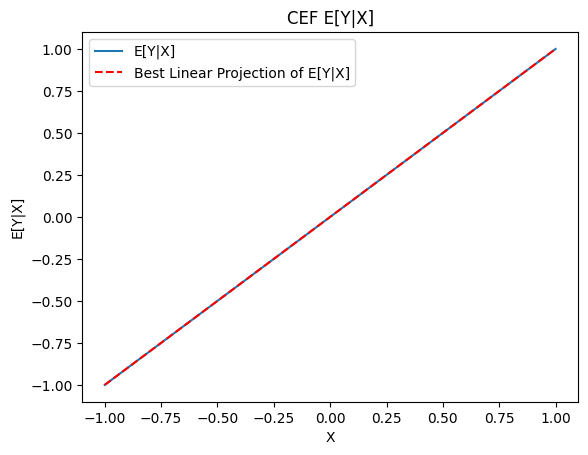

In [6]:
plt.plot(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100), label='E[Y|X]')
plt.plot(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100), label='Best Linear Projection of E[Y|X]', color="red", linestyle="dashed")
plt.title("CEF E[Y|X]")
plt.xlabel("X")
plt.ylabel("E[Y|X]")
plt.legend()
plt.show()

# 2

# i

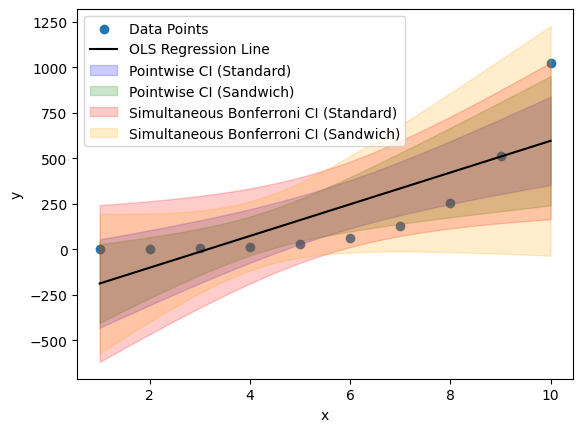

In [ ]:
import statsmodels.api as sm
from scipy.stats import norm

def confBand(x, y, conf):
    x = np.asarray(x)
    y = np.asarray(y)

    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    
    xg = np.linspace(min(x), max(x), 100)
    Xg = sm.add_constant(xg)
    yhat_g = model.predict(Xg)

    V_std = model.cov_params()
    V_rob = model.get_robustcov_results(cov_type='HC1').cov_params()

    se_std = np.sqrt(np.sum(Xg @ V_std * Xg, axis=1))
    se_rob = np.sqrt(np.sum(Xg @ V_rob * Xg, axis=1))

    z_point = norm.ppf(1 - (1 - conf) / 2)
    z_bonf = norm.ppf(1 - (1 - conf) / (2 * len(xg)))

    pw_std_u = yhat_g + z_point * se_std
    pw_std_l = yhat_g - z_point * se_std

    pw_rob_u = yhat_g + z_point * se_rob
    pw_rob_l = yhat_g - z_point * se_rob

    bonf_std_u = yhat_g + z_bonf * se_std
    bonf_std_l = yhat_g - z_bonf * se_std

    bonf_rob_u = yhat_g + z_bonf * se_rob
    bonf_rob_l = yhat_g - z_bonf * se_rob

    plt.scatter(x, y, label='Data Points')
    plt.plot(xg, yhat_g, color='black', label='OLS Regression Line')

    plt.fill_between(xg, pw_std_l, pw_std_u, color='blue', alpha=0.2, label='Pointwise CI (Standard)')
    plt.fill_between(xg, pw_rob_l, pw_rob_u, color='green', alpha=0.2, label='Pointwise CI (Sandwich)')
    plt.fill_between(xg, bonf_std_l, bonf_std_u, color='red', alpha=0.2, label='Simultaneous Bonferroni CI (Standard)')
    plt.fill_between(xg, bonf_rob_l, bonf_rob_u, color='orange', alpha=0.2, label='Simultaneous Bonferroni CI (Sandwich)')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

n = 10
x = np.arange(1, n + 1)
y = 2 ** x

confBand(x, y, 0.95)

# 3

## i

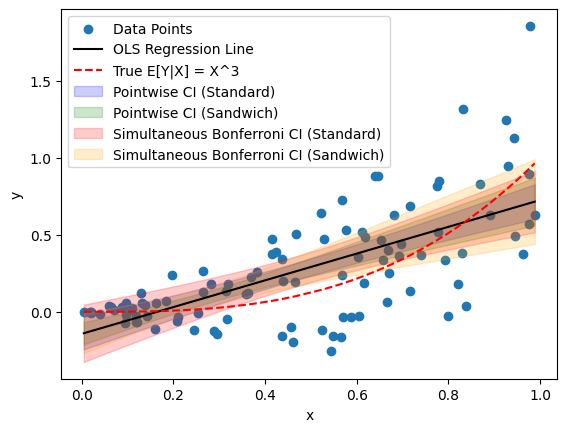

Empirical Coverage Probabilities:
Pointwise CI (Standard): 0.000
Pointwise CI (Sandwich): 0.000
Simultaneous Bonferroni CI (Standard): 0.003
Simultaneous Bonferroni CI (Sandwich): 0.003

Average Pointwise Coverage:
Pointwise CI (Standard): 0.420
Pointwise CI (Sandwich): 0.381
Simultaneous Bonferroni CI (Standard): 0.760
Simultaneous Bonferroni CI (Sandwich): 0.706


In [12]:
np.random.seed(0)

N = 1000
n = 100
conf = 0.95

pw_std_cov = 0
pw_rob_cov = 0
bonf_std_cov = 0
bonf_rob_cov = 0

pw_std_cov_i = 0
pw_rob_cov_i = 0
bonf_std_cov_i = 0
bonf_rob_cov_i = 0

for i in range(N):
    X = np.random.uniform(0, 1, n)
    Z = np.random.normal(0, 1, n)
    Y = X**3 + 0.5 * X * Z

    grid = np.sort(X)
    true_ef = grid**3

    x_data = np.asarray(X)
    y_data = np.asarray(Y)

    X_model = sm.add_constant(x_data)
    model = sm.OLS(y_data, X_model).fit()
    
    Xg = sm.add_constant(grid)
    yhat_g = model.predict(Xg)

    V_std = model.cov_params()
    V_rob = model.get_robustcov_results(cov_type='HC1').cov_params()

    se_std = np.sqrt(np.sum(Xg @ V_std * Xg, axis=1))
    se_rob = np.sqrt(np.sum(Xg @ V_rob * Xg, axis=1))

    z_point = norm.ppf(1 - (1 - conf) / 2)
    z_bonf = norm.ppf(1 - (1 - conf) / (2 * len(grid)))

    pw_std_u = yhat_g + z_point * se_std
    pw_std_l = yhat_g - z_point * se_std

    if np.all((pw_std_l <= true_ef) & (true_ef <= pw_std_u)):
        pw_std_cov += 1

    pw_std_cov_i += np.mean((pw_std_l <= true_ef) & (true_ef <= pw_std_u))

    pw_rob_u = yhat_g + z_point * se_rob
    pw_rob_l = yhat_g - z_point * se_rob

    if np.all((pw_rob_l <= true_ef) & (true_ef <= pw_rob_u)):
        pw_rob_cov += 1

    pw_rob_cov_i += np.mean((pw_rob_l <= true_ef) & (true_ef <= pw_rob_u))

    bonf_std_u = yhat_g + z_bonf * se_std
    bonf_std_l = yhat_g - z_bonf * se_std

    if np.all((bonf_std_l <= true_ef) & (true_ef <= bonf_std_u)):
        bonf_std_cov += 1

    bonf_std_cov_i += np.mean((bonf_std_l <= true_ef) & (true_ef <= bonf_std_u))

    bonf_rob_u = yhat_g + z_bonf * se_rob
    bonf_rob_l = yhat_g - z_bonf * se_rob

    if np.all((bonf_rob_l <= true_ef) & (true_ef <= bonf_rob_u)):
        bonf_rob_cov += 1
    
    bonf_rob_cov_i += np.mean((bonf_rob_l <= true_ef) & (true_ef <= bonf_rob_u))

    if i == 0:
        plt.scatter(x_data, y_data, label='Data Points')
        plt.plot(grid, yhat_g, color='black', label='OLS Regression Line')
        plt.plot(grid, true_ef, color='red', linestyle='--', label='True E[Y|X] = X^3')

        plt.fill_between(grid, pw_std_l, pw_std_u, color='blue', alpha=0.2, label='Pointwise CI (Standard)')
        plt.fill_between(grid, pw_rob_l, pw_rob_u, color='green', alpha=0.2, label='Pointwise CI (Sandwich)')
        plt.fill_between(grid, bonf_std_l, bonf_std_u, color='red', alpha=0.2, label='Simultaneous Bonferroni CI (Standard)')
        plt.fill_between(grid, bonf_rob_l, bonf_rob_u, color='orange', alpha=0.2, label='Simultaneous Bonferroni CI (Sandwich)')

        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()

print("Empirical Coverage Probabilities:")
print(f"Pointwise CI (Standard): {pw_std_cov / N:.3f}")
print(f"Pointwise CI (Sandwich): {pw_rob_cov / N:.3f}")
print(f"Simultaneous Bonferroni CI (Standard): {bonf_std_cov / N:.3f}")
print(f"Simultaneous Bonferroni CI (Sandwich): {bonf_rob_cov / N:.3f}")
print()
print("Average Pointwise Coverage:")
print(f"Pointwise CI (Standard): {pw_std_cov_i / N:.3f}")
print(f"Pointwise CI (Sandwich): {pw_rob_cov_i / N:.3f}")
print(f"Simultaneous Bonferroni CI (Standard): {bonf_std_cov_i / N:.3f}")
print(f"Simultaneous Bonferroni CI (Sandwich): {bonf_rob_cov_i / N:.3f}")